In [1]:
import sys
sys.path.append('..')

In [4]:
from utils import io
from case_study.plot_density import plot_density  #(ax, data, x, smoothing=0.5, color='b', label='')

In [5]:
import numpy as np
import torch
import dgl
import os.path as osp
from matplotlib import pyplot as plt

In [7]:
E = np.loadtxt(
    '/home/sxr/data/social_and_user_item/datasets/instance_amazon-csj-4.4m/full.txt'
    , dtype=np.int64)
g = dgl.graph((torch.LongTensor(E[:,0]), torch.LongTensor(E[:,1])))
g

Graph(num_nodes=3397863, num_edges=15318750,
      ndata_schemes={}
      edata_schemes={})

In [8]:
in_degrees = g.in_degrees()
out_degrees = g.out_degrees()

In [9]:
user_flag = out_degrees > 0
g.ndata['user_flag'] = user_flag

In [10]:
all_node_id = g.nodes()
all_item_id = all_node_id[~g.ndata['user_flag']]
all_user_id = all_node_id[g.ndata['user_flag']]

In [11]:
item_degrees = in_degrees[all_item_id].numpy()
user_degrees = out_degrees[all_user_id].numpy()

In [14]:
x = np.arange(0, 20)

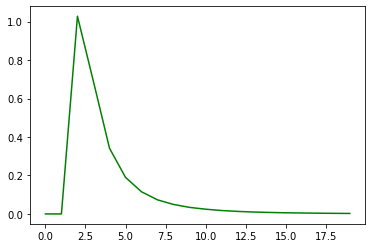

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plot_density(ax, item_degrees, x, smoothing=0.05, color='g', label='item degree')

plt.show()

In [16]:
np.percentile(item_degrees, 25)

2.0

In [17]:
np.percentile(item_degrees, 33)

2.0

In [18]:
np.percentile(item_degrees, 50)

3.0

In [19]:
np.percentile(item_degrees, 60)

3.0

In [21]:
np.percentile(item_degrees, 70)

4.0

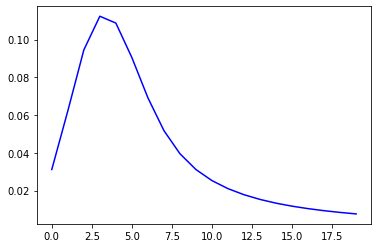

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plot_density(ax, user_degrees, x, smoothing=0.05, color='b', label='user degree')

plt.show()

In [23]:
np.percentile(user_degrees, 25)

3.0

In [24]:
np.percentile(user_degrees, 33)

3.0

In [25]:
np.percentile(user_degrees, 50)

5.0

In [26]:
np.percentile(user_degrees, 60)

6.0

In [27]:
np.percentile(user_degrees, 70)

9.0